# SC1015 A133 Group 6 - Mini Project

This project is aims to accurately predict whether a patient will have stroke based on some common factors amongs stroke patients. The dataset is from Kaggle. In this notebook, you will find the complete analysis we had done for this project. <br>
This notebook contains <br> 
- Logistic Regression

In [30]:
# Importing the necessary packages
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import warnings

In [31]:
np.random.seed(100)

In [32]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# One Hot Encoding

We use OneHotEncoding to encode categorical variables into its numeric values. There are 7 categorical variables that needed to be encoded.

In [33]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
data_cat = data[['ever_married','work_type','Residence_type','smoking_status','gender','hypertension','heart_disease']]
ohe.fit(data_cat)
data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(data_cat.columns))

# Check the encoded variables
data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ever_married_No                 5110 non-null   float64
 1   ever_married_Yes                5110 non-null   float64
 2   work_type_Govt_job              5110 non-null   float64
 3   work_type_Never_worked          5110 non-null   float64
 4   work_type_Private               5110 non-null   float64
 5   work_type_Self-employed         5110 non-null   float64
 6   work_type_children              5110 non-null   float64
 7   Residence_type_Rural            5110 non-null   float64
 8   Residence_type_Urban            5110 non-null   float64
 9   smoking_status_Unknown          5110 non-null   float64
 10  smoking_status_formerly smoked  5110 non-null   float64
 11  smoking_status_never smoked     5110 non-null   float64
 12  smoking_status_smokes           51

In [34]:
data_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ever_married_No                 5110 non-null   float64
 1   ever_married_Yes                5110 non-null   float64
 2   work_type_Govt_job              5110 non-null   float64
 3   work_type_Never_worked          5110 non-null   float64
 4   work_type_Private               5110 non-null   float64
 5   work_type_Self-employed         5110 non-null   float64
 6   work_type_children              5110 non-null   float64
 7   Residence_type_Rural            5110 non-null   float64
 8   Residence_type_Urban            5110 non-null   float64
 9   smoking_status_Unknown          5110 non-null   float64
 10  smoking_status_formerly smoked  5110 non-null   float64
 11  smoking_status_never smoked     5110 non-null   float64
 12  smoking_status_smokes           51

In [35]:
# Combining Numeric features with the OHE Categorical features
data_num = data[['age','avg_glucose_level','bmi']]
data_res = data['stroke']
data_ohe = pd.concat([data_num, data_cat_ohe, data_res], 
                           sort = False, axis = 1).reindex(index=data_num.index)

# Check the final dataframe
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             4909 non-null   float64
 3   ever_married_No                 5110 non-null   float64
 4   ever_married_Yes                5110 non-null   float64
 5   work_type_Govt_job              5110 non-null   float64
 6   work_type_Never_worked          5110 non-null   float64
 7   work_type_Private               5110 non-null   float64
 8   work_type_Self-employed         5110 non-null   float64
 9   work_type_children              5110 non-null   float64
 10  Residence_type_Rural            5110 non-null   float64
 11  Residence_type_Urban            5110 non-null   float64
 12  smoking_status_Unknown          51

In [36]:
data_ohe = data_ohe.fillna(0)
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             5110 non-null   float64
 3   ever_married_No                 5110 non-null   float64
 4   ever_married_Yes                5110 non-null   float64
 5   work_type_Govt_job              5110 non-null   float64
 6   work_type_Never_worked          5110 non-null   float64
 7   work_type_Private               5110 non-null   float64
 8   work_type_Self-employed         5110 non-null   float64
 9   work_type_children              5110 non-null   float64
 10  Residence_type_Rural            5110 non-null   float64
 11  Residence_type_Urban            5110 non-null   float64
 12  smoking_status_Unknown          51

In [37]:
warnings.filterwarnings('ignore')

In [38]:
y = pd.DataFrame(data_ohe['stroke']) # target variable
X = pd.DataFrame(data_ohe.drop('stroke', axis = 1)) # features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

params_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
}

gridCV = GridSearchCV(LogisticRegression(), param_grid=params_lr, scoring='f1')

gridCV.fit(X_train, y_train)

print(gridCV.best_params_)

{'C': 1, 'penalty': 'l2'}


In [39]:
# instantiate the model (using the optimal parameters)
logreg = LogisticRegression(C=1,penalty='l2')

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

Logistic Regression
Test Data
Accuracy  :	 0.9500978473581213
F1 score: 	 0.03773584905660378

TPR Test :	 0.019230769230769232
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.9807692307692307


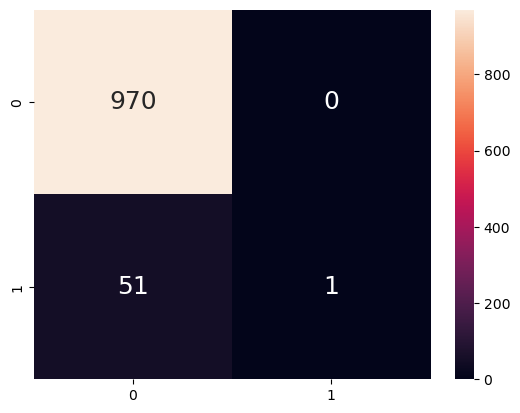

In [40]:
# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_pred)
tpTest = cmTest[1][1]
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("Logistic Regression")
print("Test Data")
print("Accuracy  :\t", accuracy_score(y_test, y_pred))
print("F1 score: \t", f1_score(y_test,y_pred))
print()
print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()
print("FPR Test :\t", (fpTest/(tnTest + fpTest)))
print("FNR Test :\t", (fnTest/(tpTest + fnTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.show()

In [41]:
target_names = ['no stroke', 'stroke']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.95      1.00      0.97       970
      stroke       1.00      0.02      0.04        52

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



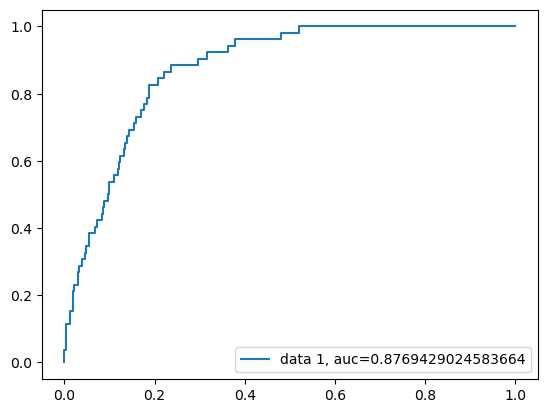

In [42]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

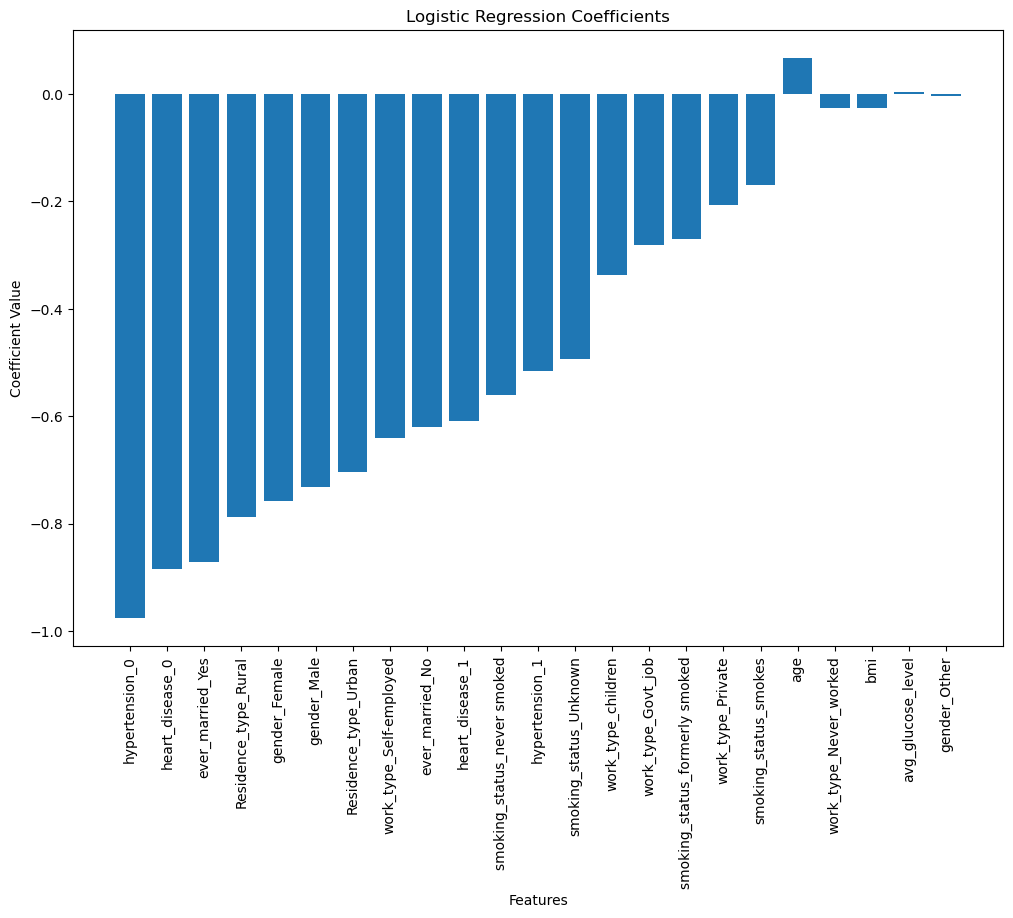

In [43]:
#feature importance 
#LR
lr = LogisticRegression(C=1,penalty='l2')
lr.fit(X_train, y_train)

# Get feature coefficients
coef = lr.coef_[0]

# Sort coefficients in descending order and get feature names
features = X.columns
coef_dict = {feat: coef for feat, coef in zip(features, coef)}
sorted_coef_dict = dict(sorted(coef_dict.items(), key=lambda x: -abs(x[1])))


#for feat, coef in sorted_coef_dict.items():
#    print(f"{feat}: {coef}")

plt.figure(figsize=(12,8))
plt.bar(sorted_coef_dict.keys(), sorted_coef_dict.values())
plt.xticks(rotation=90)
plt.title("Logistic Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

## Insights from Logistic Regression

Accuracy = 0.9562118126272913 <br>
F1 Score = 0.12244897959183673 <br>
FNR Test :	 0.9302325581395349 <br>

Althought the accuracy from logistic regression seems to be high, the F1 score is very low, indicating that the model is not performing well. Furthermore, the False Negative Rate is extremely high. And in our case of predicting stroke,  it means that predicting a patient has no stroke but the patient has a stroke. Hence, this model on logistic regression might not be the most ideal for our problem statement.